# Exercise 1 - K-Means Clustering
First, load up the “iris” dataset, then create a copy of this data without the “species” feature, called “cluster_data”. [Note: the species feature stored separately as iris.target]

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
cluster_data = iris.data

Before we begin with the clustering, we first need to establish a value for k, i.e. how many clusters is optimal for the data that we are working with. Today, we will use the “elbow” method to establish a value for k.

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a3686190>,
                 estimator=KMeans(n_clusters=10))

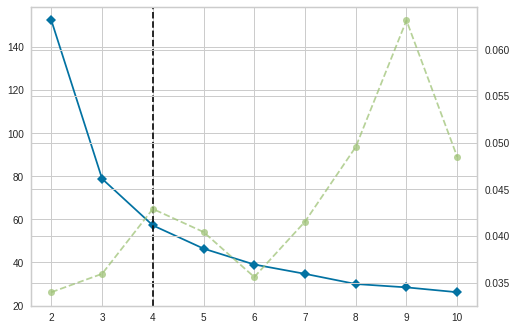

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10) 
model.fit(iris.data)

The KElbowVisualizer function produces a chart use for determining the optimal number of clusters, which can be modified through a number of parameters. The first element of the function is an unfitted cluster i.e. KMeans or MiniBatchKMeans. The second term sets the parameter to be used for evaluating the optimal cluster number. The model is then fitted with values from dataset, or in straightforward terms, the data that is to be clustered.

When looking at the plot that is produced, you should be able to see that the point where the line begins to level off, creating the appearance of an “elbow” is at the point where the number of clusters is 3. We will therefore use 3 as our value for k.

To begin the process of the k-means clustering, we establish a data object called “clusters_k3”, where the “k3” refers to the chosen value for k. To do this, we will use the kmeans function, setting the number of centroids at 3 (given here under the parameter “n_clusters”). 

In [ ]:
clusters_k3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=10, random_state=None) 
y_kmeans = clusters_k3.fit_predict(iris.data)

Note that the max_iter parameter constrains the number of iterations that are performed. When unbounded the algorithm will continue until convergence occurs.

In [ ]:
clusters_k3.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

This will provide the locations in the feature space where the 3 centroids are located after the 10 specified iterations have been completed. Now, to see the output of the clustering (i.e. which cluster each observation has been assigned to)

In [ ]:
clusters_k3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Observe the results of the clustering, and then compare it with the three classes that we know exist within the original iris data. You will most likely see that one cluster, representing the setosa plants, has been able to classify in a very accurate manner. However, it is likely that the other two classes may not have been clustered with the same degree of accuracy.

**NO, I DO NOT SEE THIS!**

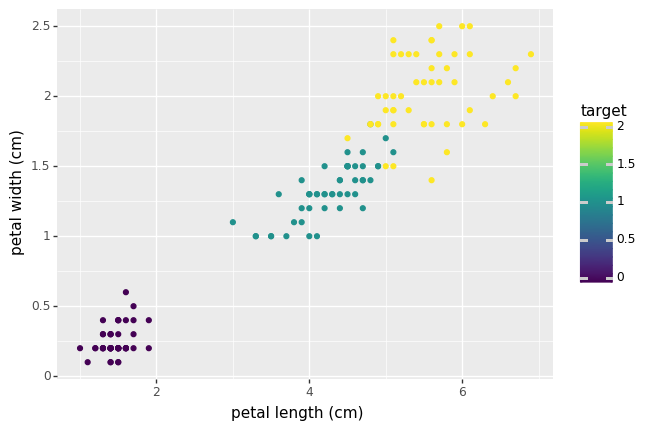

<ggplot: (8779600363429)>

In [ ]:
from plotnine import * 
import pandas as pd 
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

ggplot(data = df) + geom_point(mapping = aes(x = 'petal length (cm)', y = 'petal width (cm)', color = 'target'))

When observing this plot, we can see that there are three distinct groups, so the issues is not with the petal dimensions

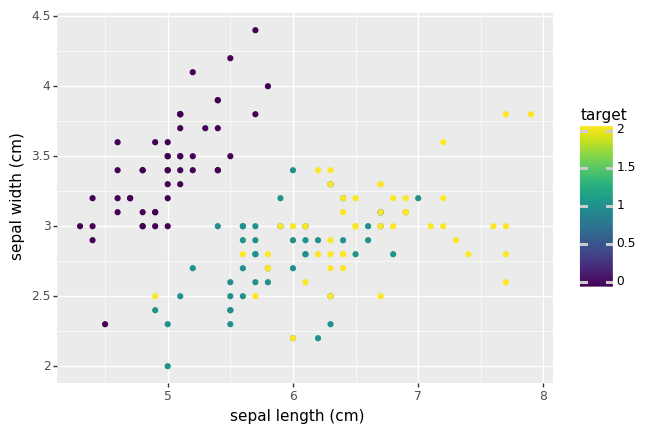

<ggplot: (8779600284921)>

In [ ]:
ggplot(data = df) + geom_point(mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target'))

We can now see that the issue is due to the overlap within the natural groupings of two of the classes within the sepal dimensions. To further examine the issue, we can plot the centroid locations, using the feature coordinates of the two features pertaining to the sepal.

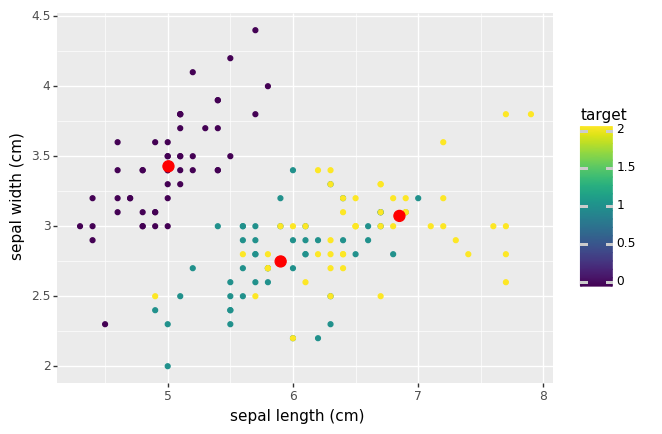

<ggplot: (8779600292569)>

In [ ]:
cluster_centroids = pd.DataFrame (clusters_k3.cluster_centers_,columns= iris['feature_names'])

ggplot(data = None) + geom_point(data = df, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target')) + geom_point(data = cluster_centroids, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)'), color = "red", size = 4)

Notice that as we are creating a plot using two different data sets, we must set the data parameter at the geom level rather than at the global level. We can now see the location of the three cluster centroids and observe how each centroid attempt to find the optimum location for class membership identification.

We have now seen how clustering is able to assist in the labelling on unlabelled or unstructured data. Even when the results are not perfect, the value of clustering is that patterns and grouping within a dataset can be identified and used a basis for further investigation and analysis.